# Geely Motors - Car Price Prediction for US Market

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goals

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Step1: Import important Libraries 

In [1]:
import warnings 

warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


Step2: Reading data and understanding it's structure

In [3]:
cars = pd.read_csv('DataSet/Car_prices.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape   #(205 rows, 26 columns)

(205, 26)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
cars.isna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Dataset seems fine with no missing or NA values

In [9]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
cars.rename(columns={'car_ID':'carID'}) #for ease of typing 

,carID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
cars['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Step3: Data Cleaning and Preprocessing 

In [13]:
#We will be chaing column 3, Car name to Compnay name for obvious reasons


CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])

cars.insert(3,'CompanyName', CompanyName)

cars.drop(['CarName'],axis = 1, inplace=True)

cars.head()


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We see that there are lots of misspelt words such as
'alfa-romero'  : 'alfa-romeo'
'maxda'  :  'mazda'
'Nissan'  : 'nissan'
'porsche' : 'porcshce'
'toyota'  :  'toyouta'
'volkswagon'  : 'vokswagen','vw'

In [15]:
#Fixing misspelt words 


cars.CompanyName = cars.CompanyName.str.lower()
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace = True)


replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagon')
replace_name('vw','volkswagon')

cars.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagon', 'volkswagen', 'volvo'],
      dtype=object)

In [16]:
#Checking for duplicated entries 

In [17]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [18]:
# So there are no duplicate columns as such 

Step4: EDA - Exploratory Data Analysis

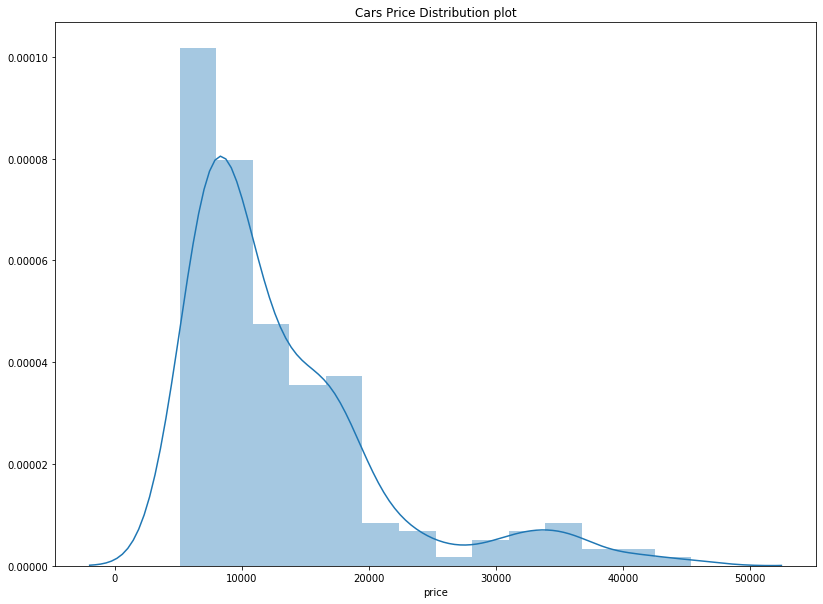

In [19]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title("Cars Price Distribution plot")
sns.distplot(cars.price)
plt.show()

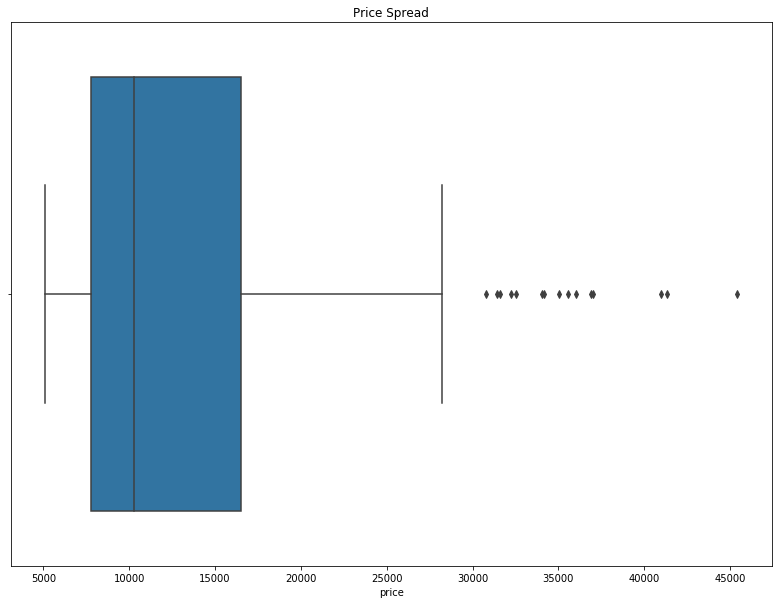

In [20]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)

plt.title('Price Spread')

sns.boxplot(cars.price)
plt.show()

In [21]:
cars.price.mean()

13276.710570731706

In [22]:
cars.price.median()

10295.0

In [23]:
cars.price.max()

45400.0

In [24]:
print(cars.price.describe(percentiles = [0.0,0.25,0.50,0.75,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
0%        5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64



Inference :

    1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
    2. There is a significant difference between the mean and the median of the price distribution.
    3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)



In [25]:
cars.head(1)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [26]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

4.1 : Visualizing Categorical Data 
- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

In [27]:
cars.head(1)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [28]:
cars.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [29]:
cars.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [30]:
cars.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [31]:
cars.aspiration.unique()

array(['std', 'turbo'], dtype=object)

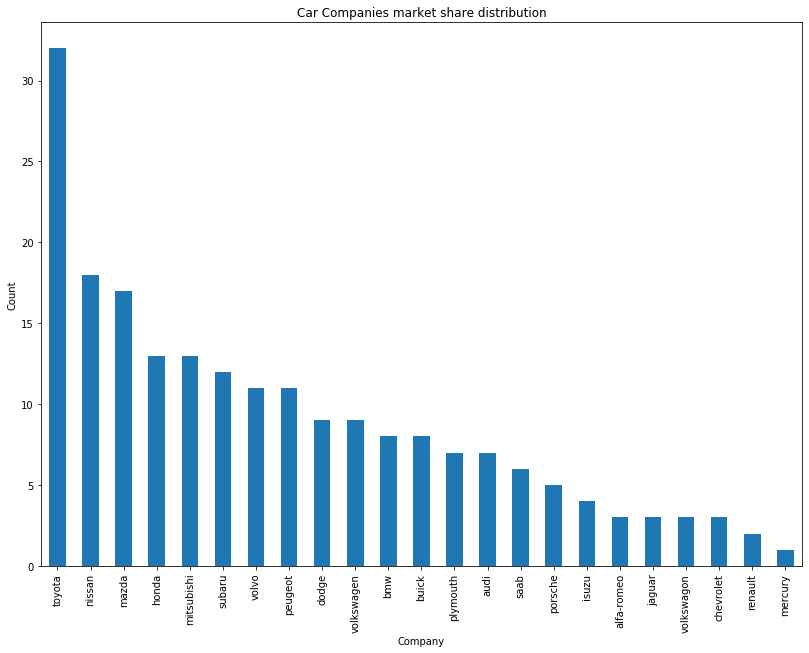

In [32]:
#Company market share

plt.figure(figsize=(30,10))

plt.subplot(1,2,1)

rep = cars.CompanyName.value_counts().plot(kind='bar')

rep.set(xlabel='Company',ylabel='Count')
plt.title("Car Companies market share distribution")

plt.show()


Infrence: Toyota is leading car manufacturer clearly

In [33]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

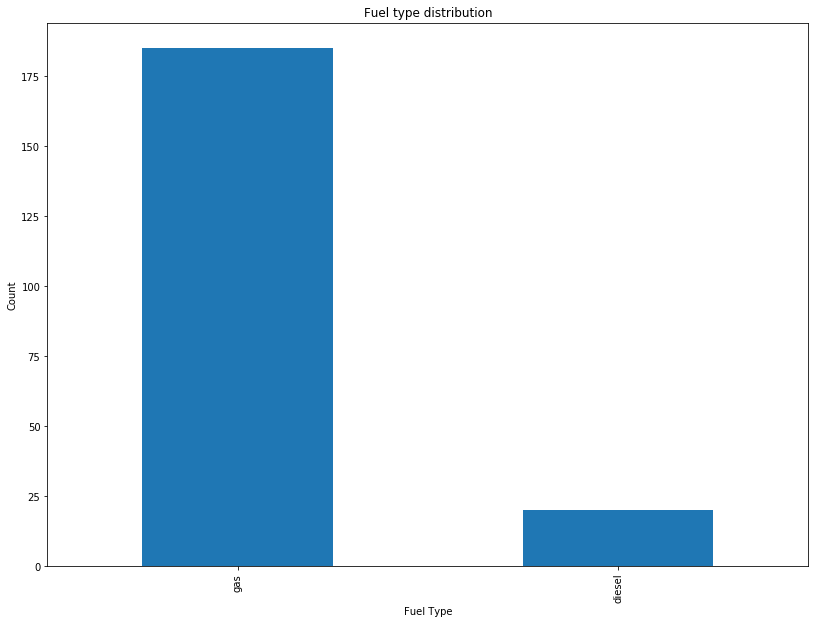

In [34]:
#Car fuel type distribution 

plt.figure(figsize=(30,10))

plt.subplot(1,2,1)

plt.title("Fuel type distribution")

rep = cars.fueltype.value_counts().plot(kind='bar')

rep.set(xlabel='Fuel Type',ylabel='Count')

plt.show()

Infrence: Almost 90% cars are of 'Gas' Fuel type

In [35]:
cars.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

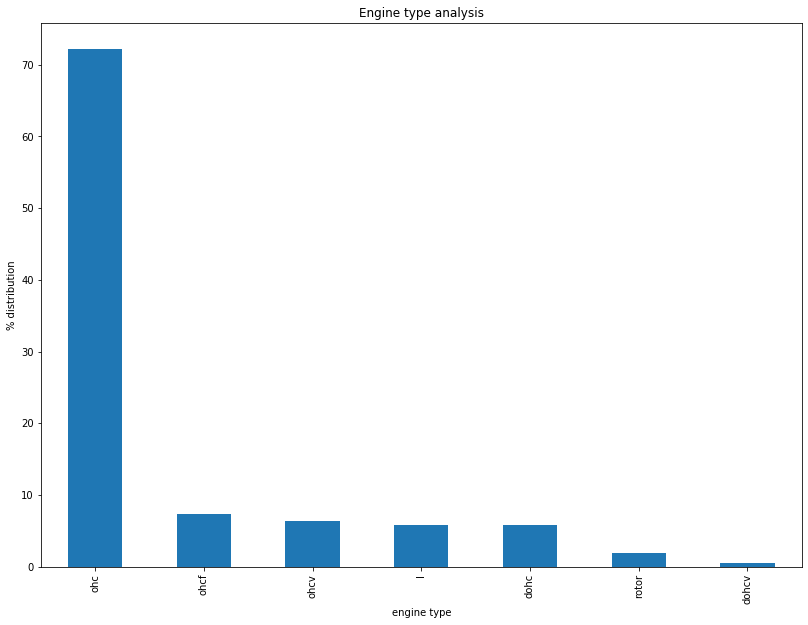

In [36]:
#Visualizing engine type

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.title('Engine type analysis')

rep = (cars.enginetype.value_counts(normalize=True)*100).plot(kind='bar')

rep.set(xlabel = 'engine type',ylabel='% distribution')

plt.show()

In [37]:
cars.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

Infrence: Almost 75% cars have ohc engine types

In [38]:
cars.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [39]:
cars.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

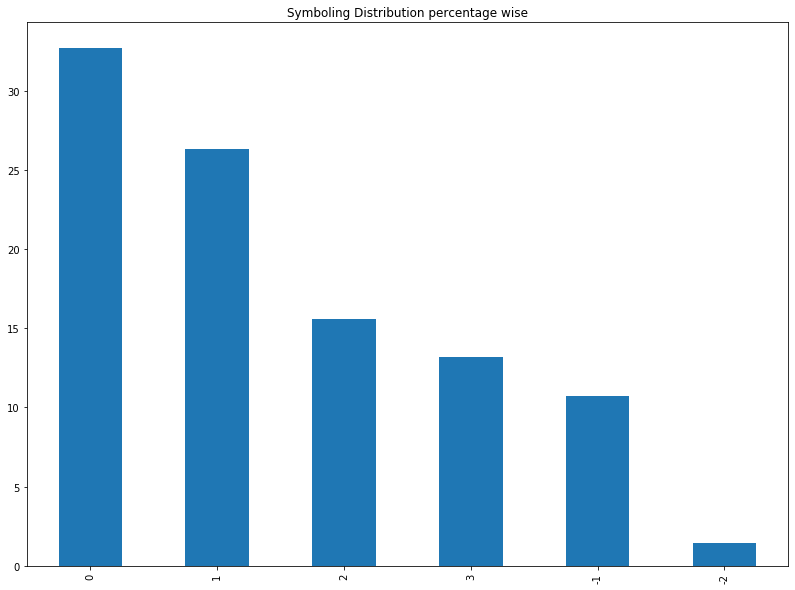

In [40]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)

plt.title('Symboling Distribution percentage wise')

rep = (cars.symboling.value_counts(normalize=True)*100).plot(kind='bar')

rep.xlabel='Symboling value'
rep.ylabel='% Distribution'

plt.show()

Infrence: Risk factors for most cars (compared to price) is 0 and 1 which is still okay

In [41]:
cars.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

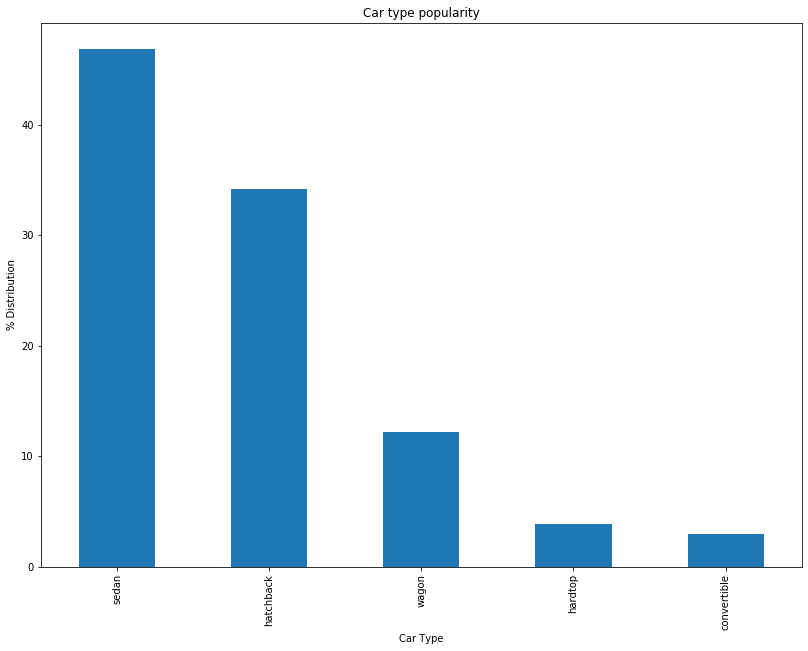

In [42]:
# car body ie.. which type of cars are more popular

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)

plt.title('Car type popularity')

rep = (cars.carbody.value_counts(normalize=True)*100).plot(kind='bar')
rep.set(xlabel='Car Type', ylabel='% Distribution')

plt.show()

In [43]:
cars.carbody.value_counts(normalize=True)*100

sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: carbody, dtype: float64

Infrence: Sedans and hatchbacks are more preferable where sedan tops the market

Symboling vs Price

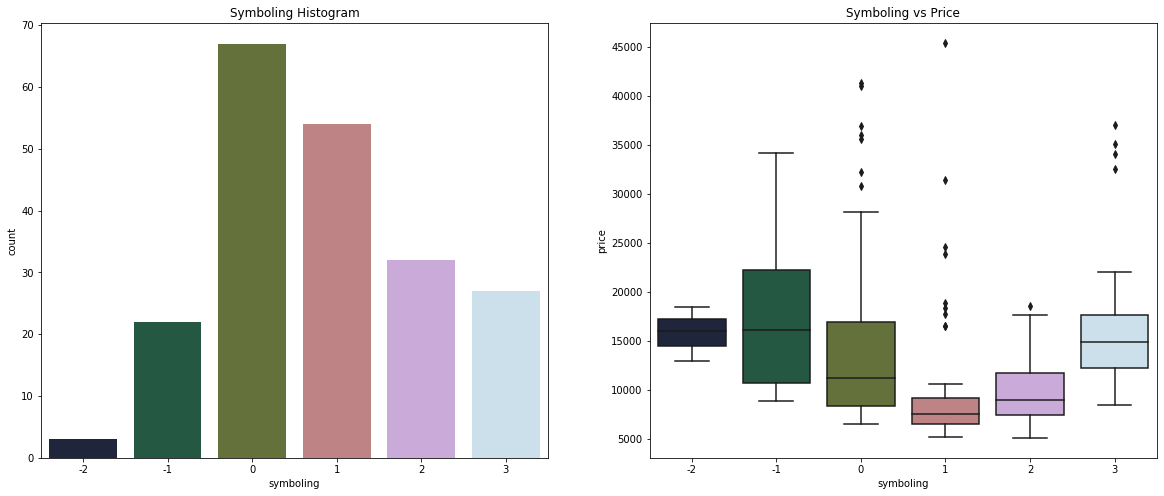

In [44]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()




Inference :

   It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
       The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.



Engine type vs Price

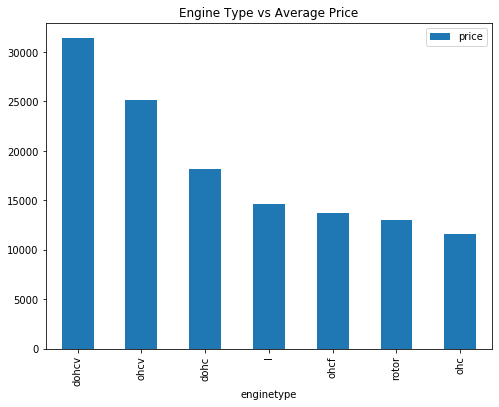

In [45]:
df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

Inference

1.ohc Engine type seems to be most favored type.
2.ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range

Company, fuel type, car type vs Average price

<Figure size 1800x432 with 0 Axes>

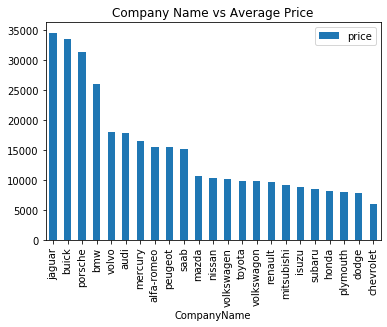

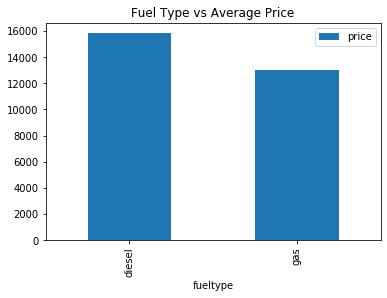

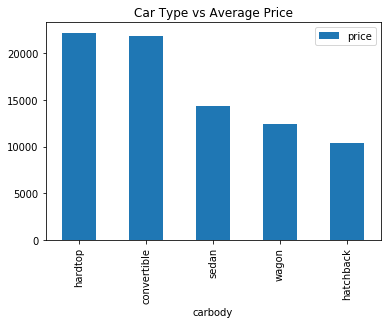

In [46]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inference 

    1.Jaguar and Buick seem to have highest average price.
    2.diesel has higher average price than gas.
    3.hardtop and convertible have higher average price.


Door number, aspiration vs price

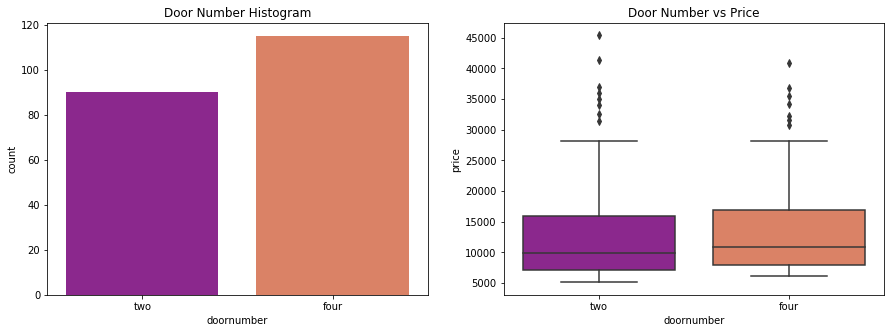

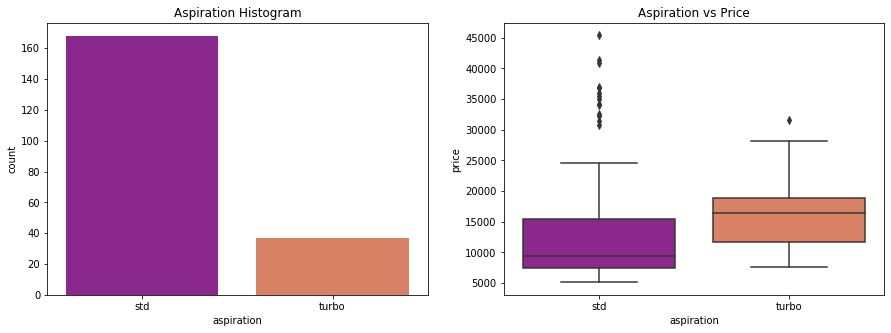

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


Inference 

    1.doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
    2.It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)



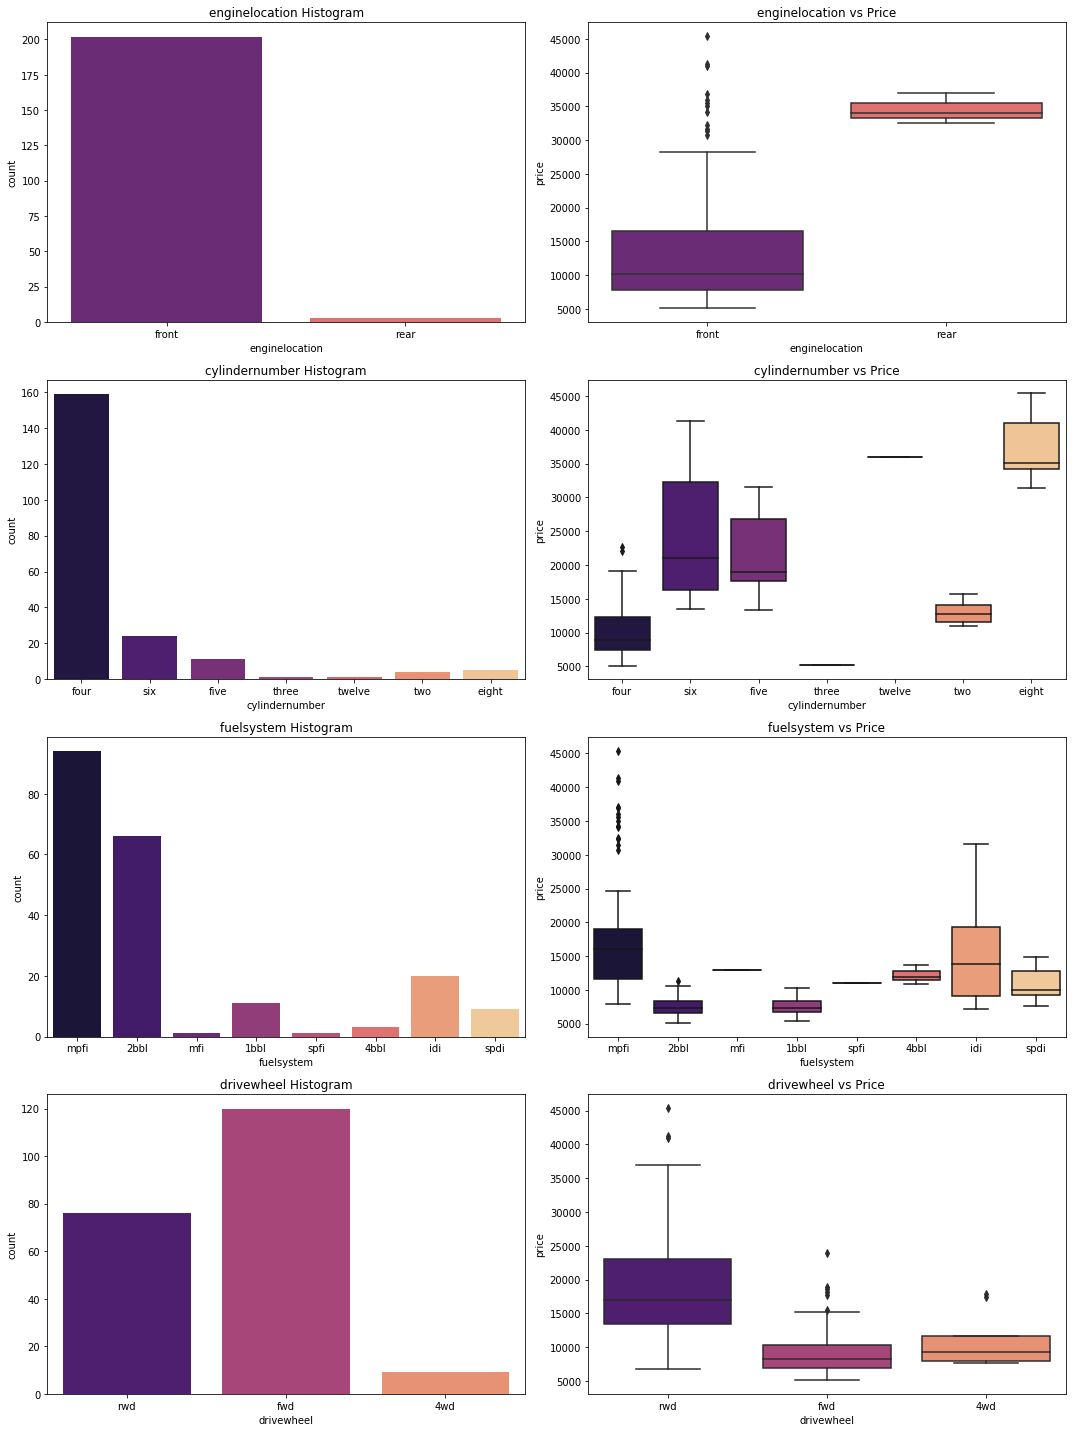

In [48]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()


Inference :

    1.Very few datapoints for enginelocation categories to make an inference.
    2.Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
    mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
    3.A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.



Visualizing numerical data

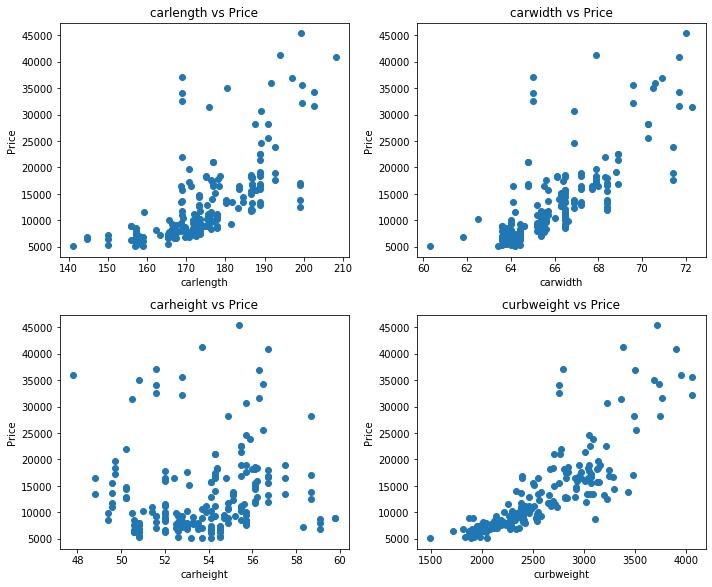

In [49]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()


Inference :

    1.carwidth, carlength and curbweight seems to have a poitive correlation with price.
    2.carheight doesn't show any significant trend with price.



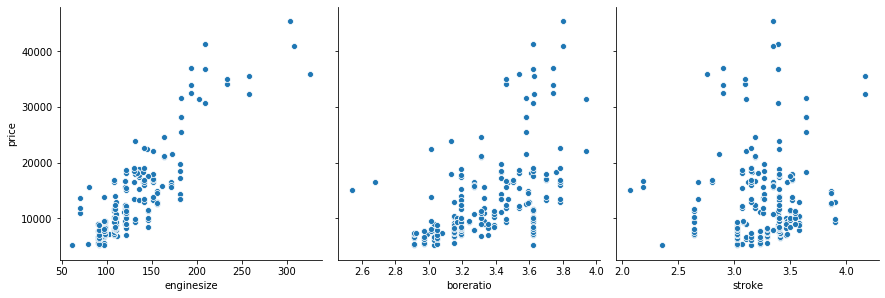

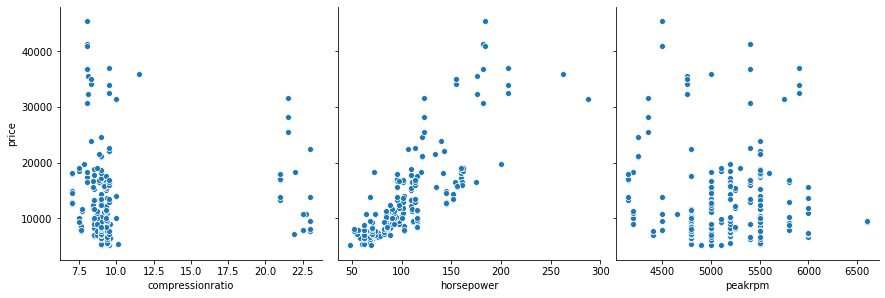

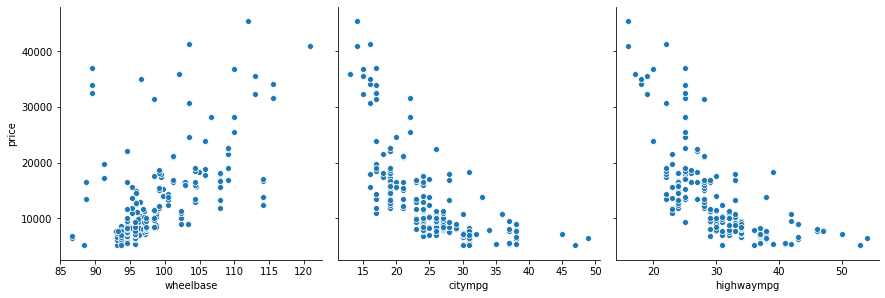

In [50]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')


Inference :

    1.enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
    2.citympg, highwaympg - seem to have a significant negative correlation with price.



In [51]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

In [52]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

We will be introducing a new variable, Fuel Economy and we will bin cars according to price range into three categories

In [53]:
# Fuel Economy 

cars['fuelEconomy'] = (0.55*cars['citympg']+ 0.45*cars['highwaympg'])
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fuelEconomy'],
      dtype='object')

In [54]:
cars['fuelEconomy']

0      23.70
1      23.70
2      22.15
3      26.70
4      19.80
       ...  
200    25.25
201    21.70
202    20.25
203    26.45
204    21.70
Name: fuelEconomy, Length: 205, dtype: float64

In [55]:
#Binning the cars according to average price of the companies

cars['price'] = cars['price'].astype(int)

temp = cars.copy()

table = temp.groupby(cars['CompanyName'])['price'].mean()

temp = temp.merge(table.reset_index(),how = 'left', on='CompanyName')

bins = [0,10000,20000,40000]
cars_bins = ['HighEnd','Mid Segment', 'Budget']

cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bins)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuelEconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Mid Segment
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Mid Segment
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Mid Segment
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Mid Segment
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Mid Segment


Step5: Bivariate analysis

Fuel Economy vs Price

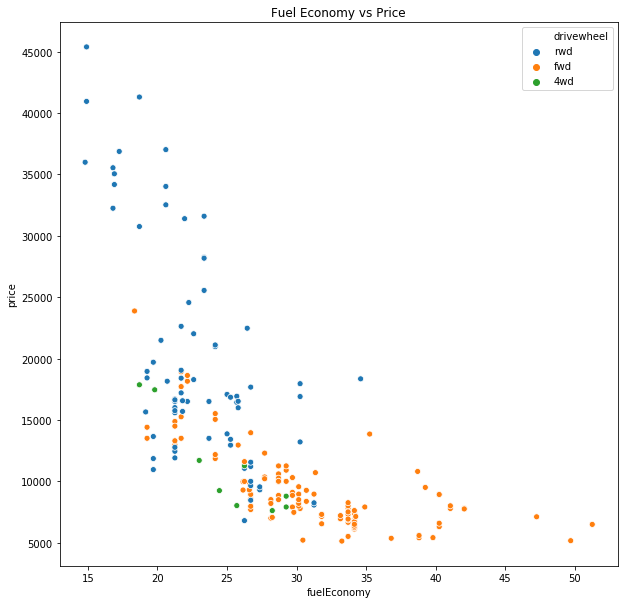

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(10,10))
plt.title("Fuel Economy vs Price")

sns.scatterplot(x=cars['fuelEconomy'], y=cars['price'],hue=cars['drivewheel'])

plt.xlabel='Fuel Economy'
plt.ylabel='Price'

plt.show()
plt.tight_layout()


Inference :

    1.fueleconomy has an obvios negative correlation with price and is significant.



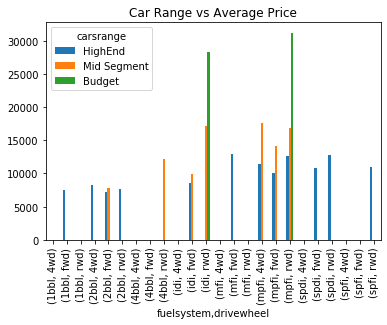

In [57]:


df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()


Inference :

    High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.



# List of significant variables after Visual analysis :

- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [58]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fuelEconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fuelEconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Mid Segment
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Mid Segment
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Mid Segment
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Mid Segment
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Mid Segment


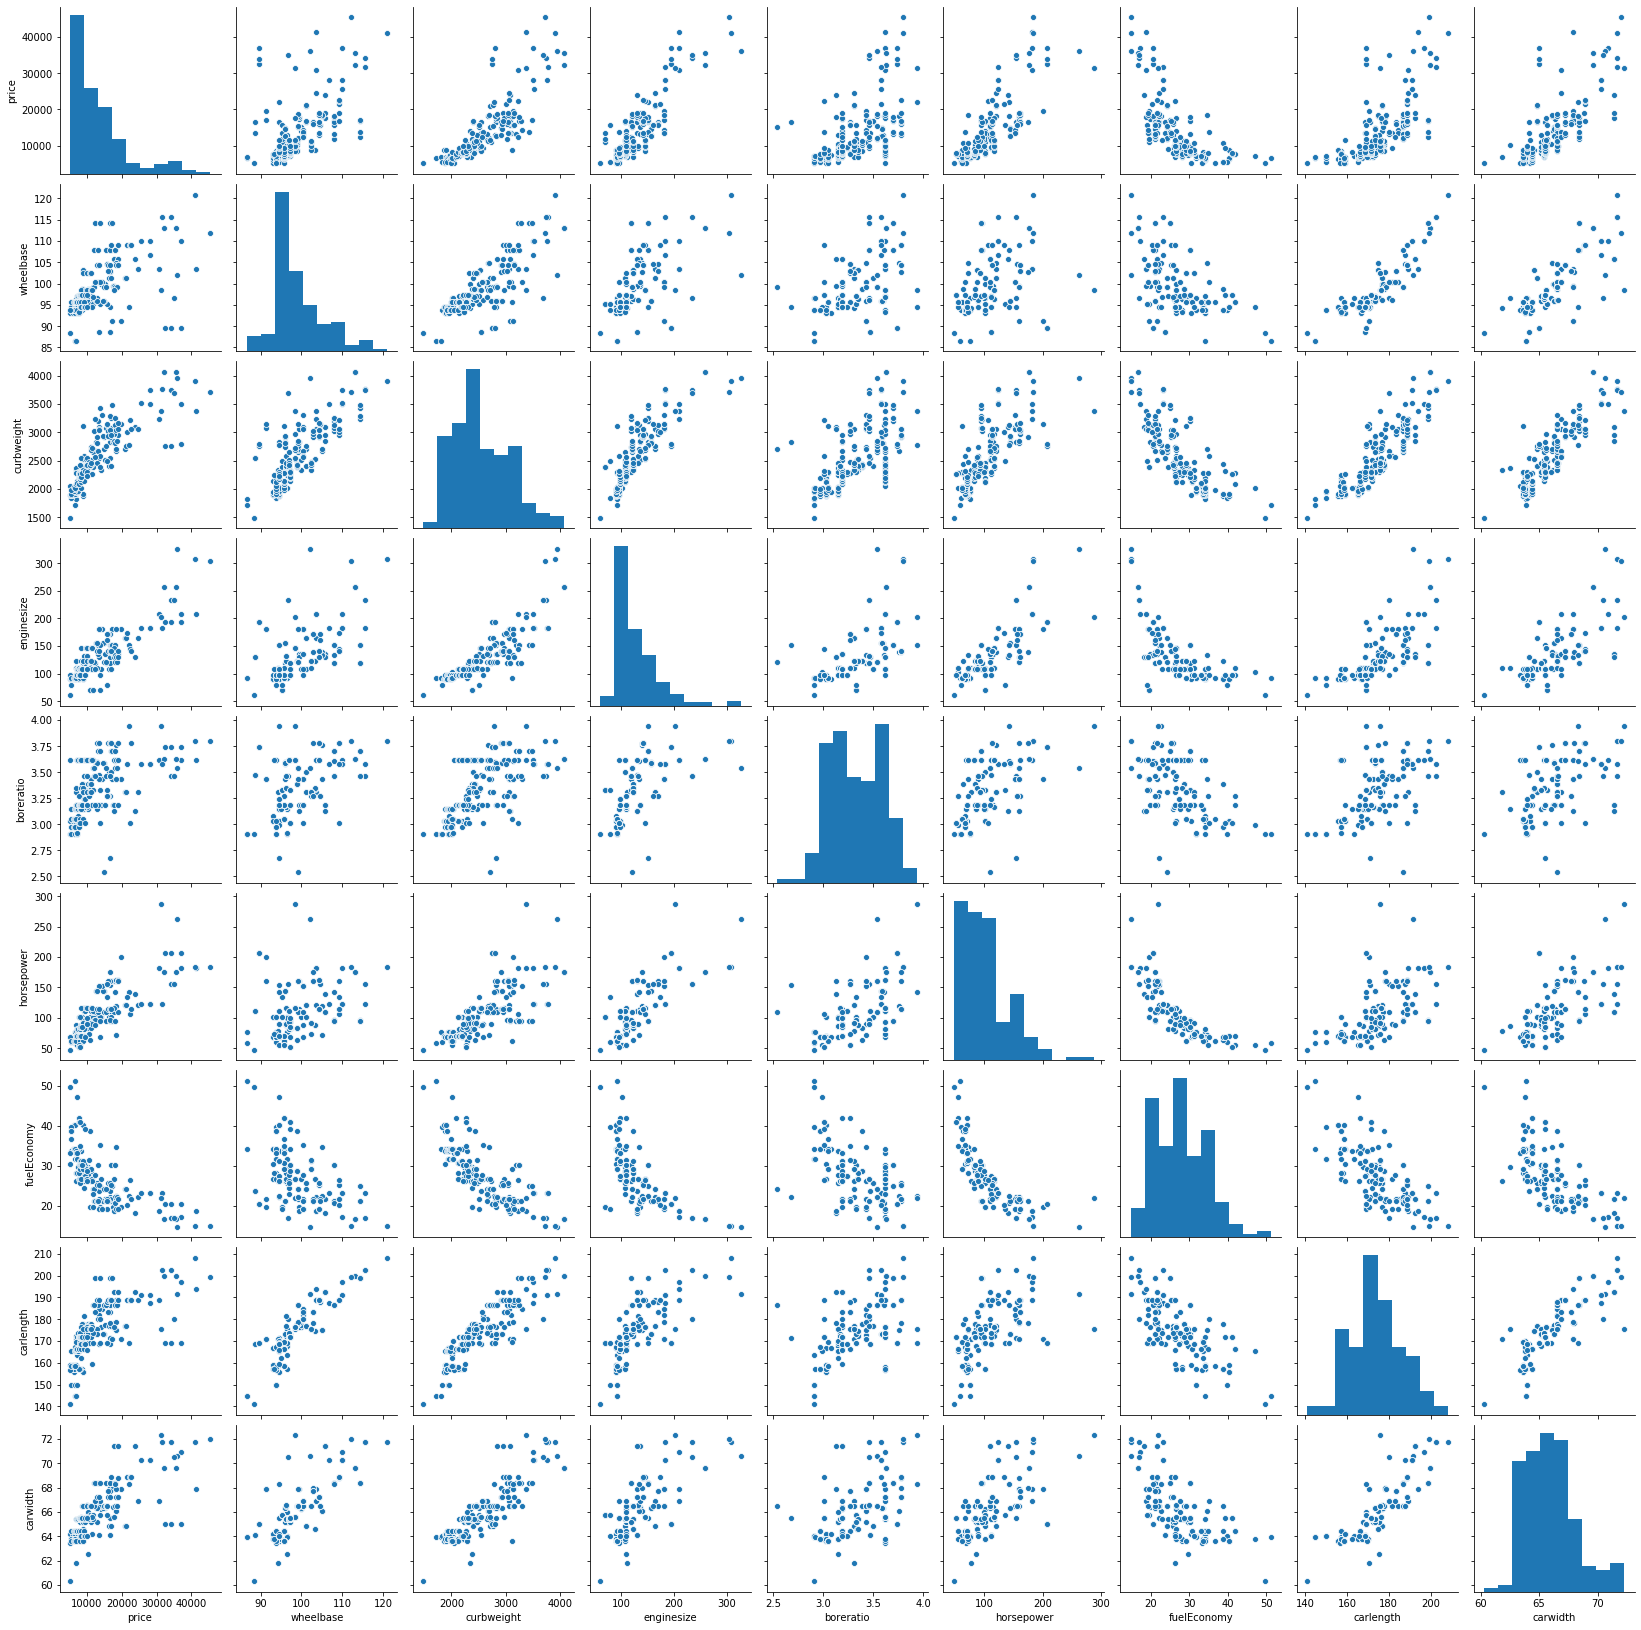

In [59]:
sns.pairplot(cars_lr)
plt.show()

Dummy variables

In [60]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [61]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fuelEconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Mid Segment,Budget
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [63]:
cars_lr.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fuelEconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Mid Segment', 'Budget'],
      dtype='object')

In [64]:
cars_lr.shape

(205, 31)

Train-Test Split and feature Scaling

In [65]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

Min-Max Scaling for better results

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fuelEconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [68]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fuelEconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Mid Segment,Budget
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [69]:
df_train[num_vars]

,wheelbase,curbweight,enginesize,boreratio,horsepower,fuelEconomy,carlength,carwidth,price
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,0.068818
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,0.466890
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,0.122110
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,0.314446
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,0.382131
...,...,...,...,...,...,...,...,...,...
87,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000,0.114954
103,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667,0.231539
67,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333,0.564522
24,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667,0.030693


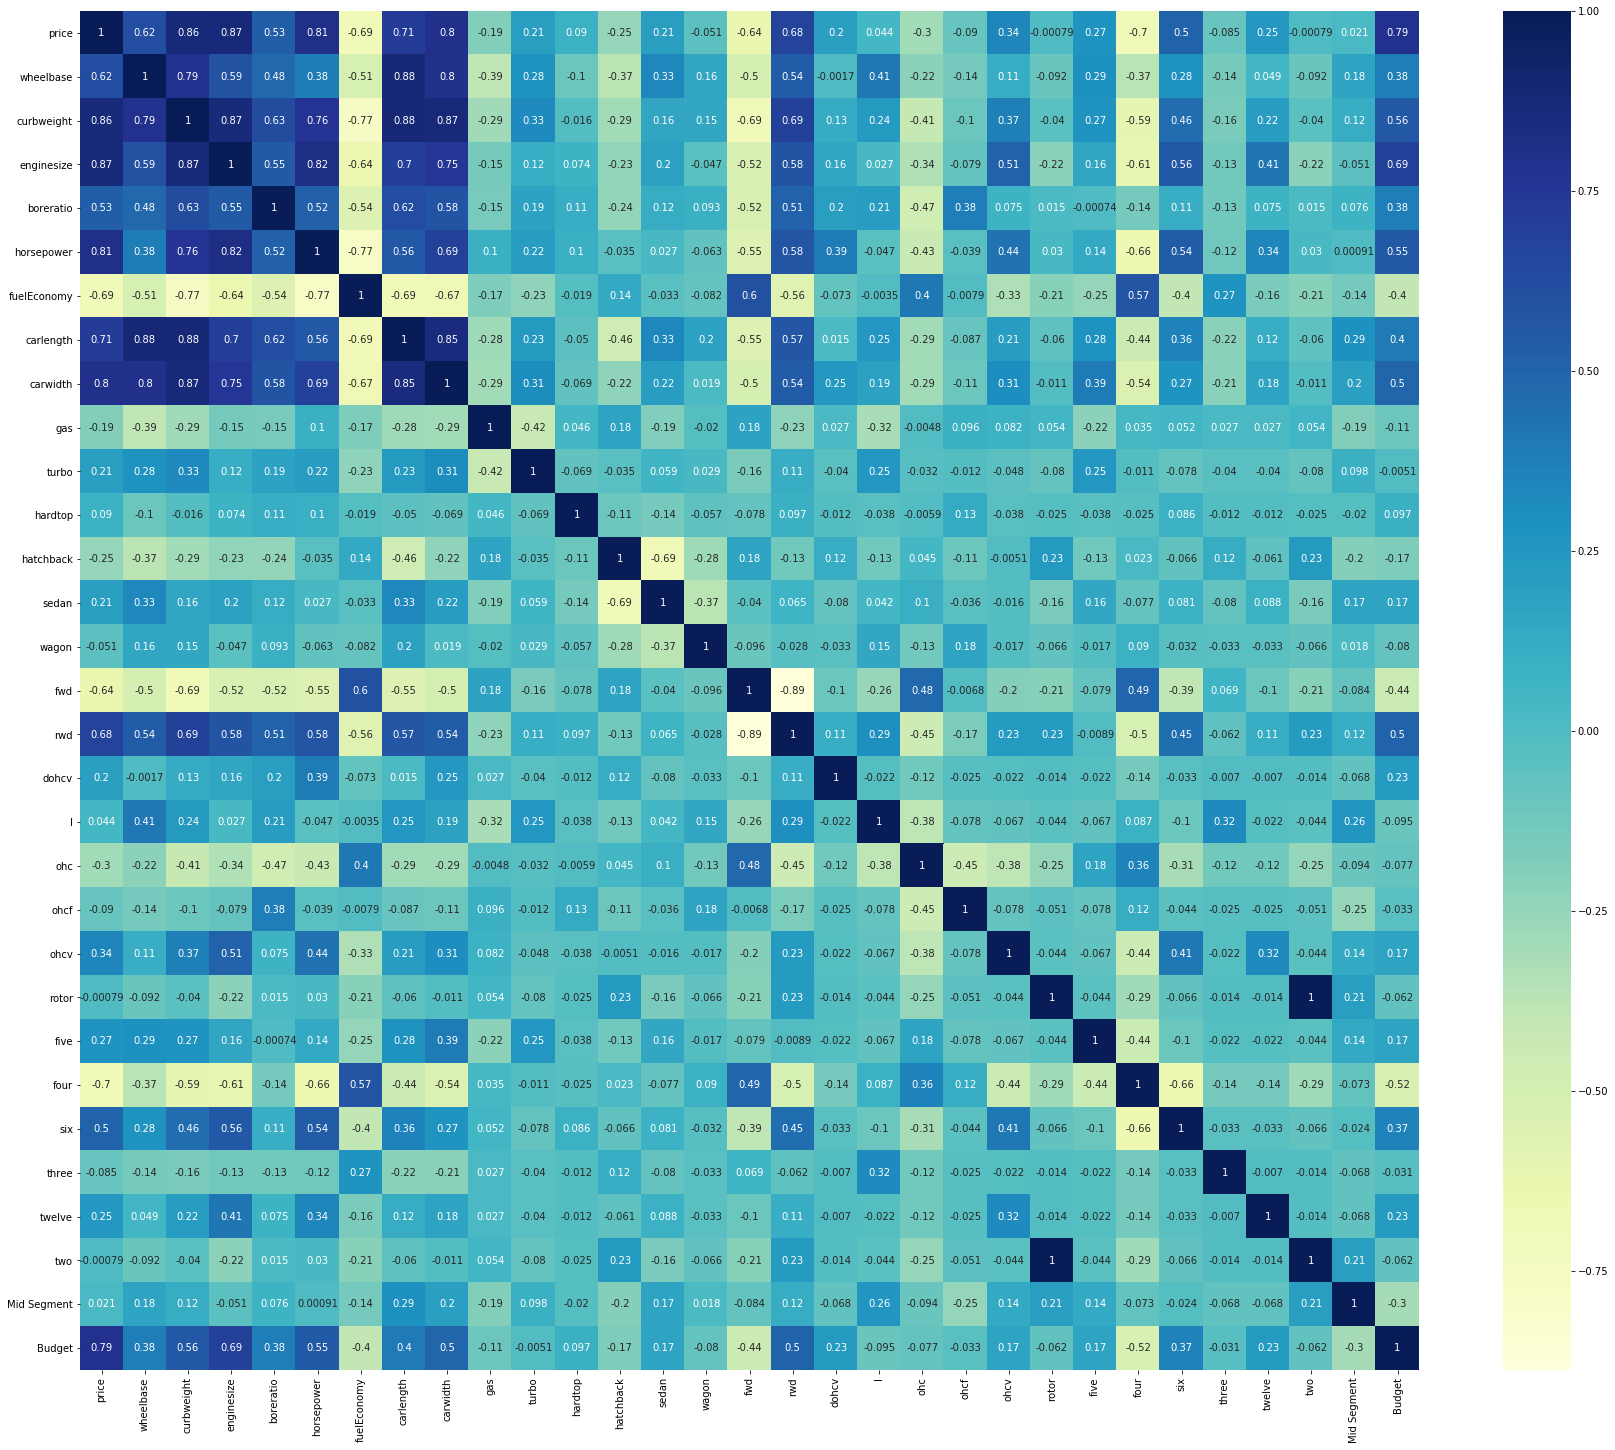

In [70]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [71]:
num_vars

['wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'fuelEconomy',
 'carlength',
 'carwidth',
 'price']

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

In [72]:
#Dividing the data into X and y

y_train = df_train.pop('price')

X_train = df_train

Model Building 

Linear regression and RFE

In [73]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
lm = LinearRegression()

lm.fit(X_train,y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fuelEconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 16),
 ('turbo', False, 17),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 15),
 ('rwd', False, 18),
 ('dohcv', True, 1),
 ('l', False, 21),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 13),
 ('twelve', True, 1),
 ('two', False, 19),
 ('Mid Segment', False, 12),
 ('Budget', True, 1)]

In [76]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fuelEconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Budget'],
      dtype='object')

Building model using statsmodel, for the detailed statistics¶

In [77]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fuelEconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Budget
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [78]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

MODEL 1

In [79]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.29e-70
Time:                        02:30:34   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

p-vale of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [80]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

MODEL 2

In [81]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.25e-71
Time:                        02:31:23   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [84]:
X_train_new = X_train_new.drop(["fuelEconomy"], axis = 1)

MODEL 3

In [85]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           7.85e-72
Time:                        02:32:06   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [86]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Budget,1.63
7,dohcv,1.46


dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

MODEL 4

In [87]:


X_train_new = build_model(X_train_new,y_train)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           7.85e-72
Time:                        02:32:53   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [88]:


checkVIF(X_train_new)



,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Budget,1.63
7,dohcv,1.46


dropping sedan because of high VIF value.

In [89]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

MODEL 5

In [90]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     226.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           2.56e-71
Time:                        02:33:49   Log-Likelihood:                 198.86
No. Observations:                 143   AIC:                            -381.7
Df Residuals:                     135   BIC:                            -358.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0881      0.017     -5.151      0.0

In [91]:


checkVIF(X_train_new)



,Features,VIF
0,const,10.89
1,curbweight,8.09
3,carwidth,4.94
2,horsepower,3.52
7,Budget,1.63
6,dohcv,1.46
4,hatchback,1.27
5,wagon,1.27


dropping wagon because of high p-value.

In [93]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

MODEL 6

In [94]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     254.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           2.23e-71
Time:                        02:34:58   Log-Likelihood:                 196.02
No. Observations:                 143   AIC:                            -378.0
Df Residuals:                     136   BIC:                            -357.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0967      0.017     -5.693      0.0

In [95]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,curbweight,7.08
3,carwidth,4.62
2,horsepower,3.36
6,Budget,1.57
5,dohcv,1.41
4,hatchback,1.22


MODEL 7

In [96]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     285.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.30e-70
Time:                        02:35:28   Log-Likelihood:                 191.12
No. Observations:                 143   AIC:                            -370.2
Df Residuals:                     137   BIC:                            -352.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0876      0.017     -5.079      0.0

,Features,VIF
0,const,10.09
1,curbweight,6.07
3,carwidth,4.26
2,horsepower,2.79
5,Budget,1.56
4,hatchback,1.22


# Residual Analysis of Model

In [98]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

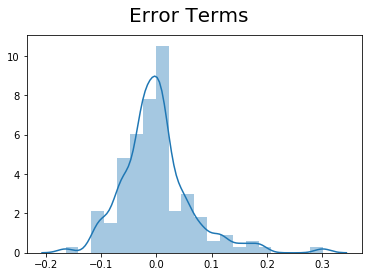

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel = 'Errors'

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

# Prediction and Evaluation

In [107]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fuelEconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [108]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [110]:
 #Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [111]:
# Making predictions User input goes here
y_pred = lm.predict(X_test_new)

Evaluation of test via comparison of y_pred and y_test

In [112]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8787521385728719

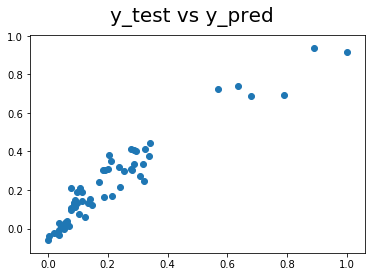

In [115]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel = 'y_test'
plt.ylabel='y_pred'
plt.show()

Evaluation of the model using Statistics

In [116]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     285.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.30e-70
Time:                        02:44:24   Log-Likelihood:                 191.12
No. Observations:                 143   AIC:                            -370.2
Df Residuals:                     137   BIC:                            -352.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0876      0.017     -5.079      0.0


Inference :

1.R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896 - 90% variance explained.
        
2.F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.

3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

